In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv');

In [3]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Few eye catchers
- The standard deviation is quite large
- The mean 3145.128000 is a lot higher than the median 284.000000

In [7]:
# AOV
df['order_amount'].sum()/df['total_items'].count()

3145.128

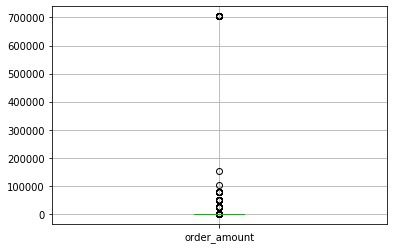

In [8]:
# Check for outliers
boxplot = df.boxplot(column=['order_amount'])

In [34]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='freq').sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,freq
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


# Question 1a
- The outliers are skewing the AOV, specifically the 17 orders costing $704000
- Removing the outliers and recomputing the AOV will gives us more accurate results, with a smaller standard deviation and a mean and median that are closer.


In [19]:
# remove the outliers and recalculate AOV
cols = ['order_amount']
Q1 = df[cols].quantile(0.25)
Q2 = df[cols].quantile(0.50)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((df[cols] < (Q2 - 1.5 * IQR)) | (df[cols] > (Q2 + 1.5 * IQR))).any(axis=1)]

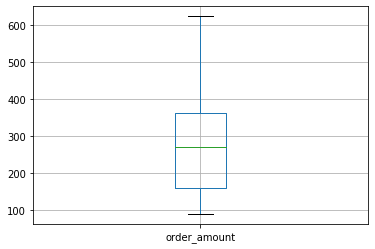

In [20]:
boxplot = df_filtered.boxplot(column=['order_amount'])

# Question 1b
- Since the IRQ is skewed low, the median is a better metric. The mean will be skewed high by the outliers from the upper quartile.

In [38]:
df_filtered['order_amount'].median()

272.0

# Question 1c
The final value is $272!